In [1]:
import numpy as np         
import pandas as pd        
import matplotlib.pyplot as plt             
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv('data.csv', header=None)
data.columns=['x_val','y_val']

data['x_val']=(data['x_val']-data['x_val'].mean())/data['x_val'].std()
data['y_val']=(data['y_val']-data['y_val'].mean())/data['y_val'].std()



x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values.reshape(-1,1)

In [3]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [4]:
class linear_regression_with_ridge:
    def __init__(self, epochs, alpha, lamda):
        self.alpha=alpha
        self.epochs=epochs
        self.lamda=lamda
        self.weight=None
        self.cost_array=[]
        self.cost_ridge_array=[]

    def fit(self, x, y):
        sample, features=x.shape
        self.weight=np.zeros((features+1,1))
        x=np.hstack((np.ones((sample,1)),x))
        
        for i in range(self.epochs):
            y_pred= x@ self.weight
            error=y_pred-y
            cost=(1/(2*sample))*np.sum(error**2)
            cost_ridge=cost+(self.lamda/(2*sample))* np.sum(self.weight[1:]**2)
            self.cost_array.append(cost)
            self.cost_ridge_array.append(cost_ridge)
            gradient=(1/sample)*x.T @ error + (self.lamda/sample)* self.weight
            self.weight-=self.alpha*gradient

    def predict(self, x):
        sample, features=x.shape
        x=np.hstack((np.ones((sample,1)),x))
        y_pred= x@ self.weight
        return y_pred



In [11]:
model=linear_regression_with_ridge(epochs=1000, alpha=0.01, lamda=5)
model.fit(x_train, y_train)

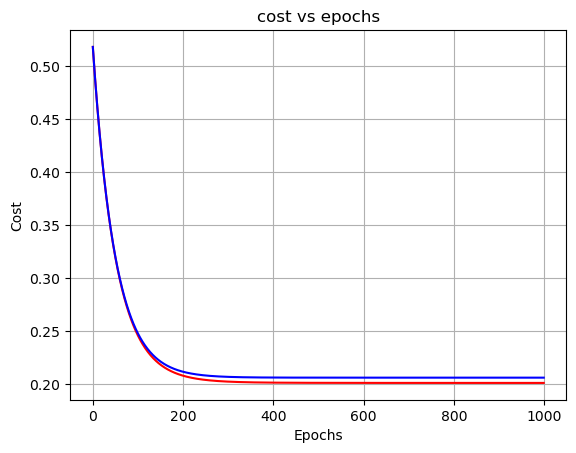

In [12]:
linear_cost=model.cost_array
linear_cost_ridge=model.cost_ridge_array

plt.plot(range(len(linear_cost)), linear_cost, color='red')
plt.plot(range(len(linear_cost_ridge)), linear_cost_ridge, color='blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('cost vs epochs')
plt.grid()
plt.show()
